<img style="float: right; margin: 0px 0px 15px 15px;" src="https://profesionaljdeabajo.files.wordpress.com/2013/08/clima.png" width=400"px" height="200px" />

## 1.1 LA ENERGÍA SEGÚN EL ESTADO DE TIEMPO

<p style="text-align: justify;">Este proyecto se basará en la base de datos que el CENACE otorgó. El Centro Nacional de Control de Energía (CENACE) es un organismo público descentralizado cuyo objeto es ejercer el Control Operativo del Sistema Eléctrico Nacional.</p>

- Integrante 1: Castillo Fuhr Araceli Soledad
- Integrante 2: Ramírez Hinojosa Diana Laura


### 1.2 Objetivos.
#### 1.21 Objetivo general.
>  - Identificar si las variables del estado de tiempo deben ser consideradas en el pronóstico de la demanda de energía.
> #### 1.22 Objetivos específicos
>  - Determinar si la temperatura ponderada tiene una alta correlación con la demanda de energía.
>  - Establecer si la demanda de energía se ve afectada por la velocidad del viento ponderado.
>  - Precisar la relación entre la nubosidad y la demanda de energía
>  - Señalar si la demanda de energía y la lluvia son recíprocas

### 1.3 Definición del problema.
<p style="text-align: justify;"> El CENACE de occidente genera la energía necesaria para abastecer a nueve estados de la república. Debido a lo indispensable que es la energía para los mexicanos, este organismo público descentralizado debe ser capaz de abastecer la demanda de este insumo. El CENACE se enfrenta diariamente a tres posibles escenarios: </p>

>  - Que la producción de energía sea mayor a la demanda, generando pérdidas para la empresa.
>  - Que la demanda sea mayor a la producción de energía, dejando a muchas familias sin este recurso.
>  - Que la demanda y la producción sean equivalentes, que es lo ideal para este organismo. 

<p style="text-align: justify;">Es evidente entonces que es necesaria una producción acertada de la demanda. Para esto se utilizan modelos como regresiones. Pero el CENACE se encuentra ante un dilema: ¿Deben considerar, aparte de la información que la misma serie de datos otorga, las variables del estado del tiempo?</p>

<p style="text-align: justify;">Dicho lo anterior, el proyecto que a continución se desarrolla presentará cuatro nodos correspondientes a las cuatro variables del estado del tiempo que el CENACE cree que pueden ser relevantes en el prónistico de la demanda de energía</p>

<img src="Nodos.JPG">

El supuesto a considerar es que estas variables del estado de tiempo son independientes.

### 1.4 Nodos y variables que se decidieron simular y porqué.
Como ya se mencionó en los objetivos y en la definición del problema, las variables que se decidieron simular son:
>  - Temperatura
>  - Lluvia
>  - Nubosidad
>  - Velocidad del viento

El problema que se abordará, analizando estas variables, es determinar si son modelables con algún tipo de distribución, para precisar si deben ser incluidas en el pronóstico de la gerencia del CENACE de Occidente, o si tomarlas en cuenta generaría únicamente ruido en el resultado.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_excel('Consumo.xlsx',index_col='fecha')
data

,MWh,mín,max,prom,Nubosidad,Lluvia,Velocidad viento
fecha,,,,,,,
2003-01-01,84916.880000,11.000000,25.571429,18.285714,19.158481,0.000000,32.222222
2003-01-02,110122.854000,8.857143,24.928571,16.892857,25.895938,0.000000,26.666667
2003-01-03,118008.561000,10.214286,25.071429,17.642857,24.533273,0.000000,25.000000
2003-01-04,113925.116000,11.214286,25.357143,18.285714,29.882270,0.000000,25.000000
2003-01-05,105063.005000,12.500000,24.928571,18.714286,37.579263,0.000000,25.277778
2003-01-06,118471.181000,13.142857,22.000000,17.571429,35.592096,0.000000,22.500000
2003-01-07,122805.435000,11.928571,22.785714,17.357143,43.186654,1.046067,31.666667
2003-01-08,122439.794000,12.642857,25.928571,19.285714,33.609614,0.000000,31.666667
2003-01-09,123092.036000,14.071429,25.285714,19.678571,25.520305,0.000000,31.666667


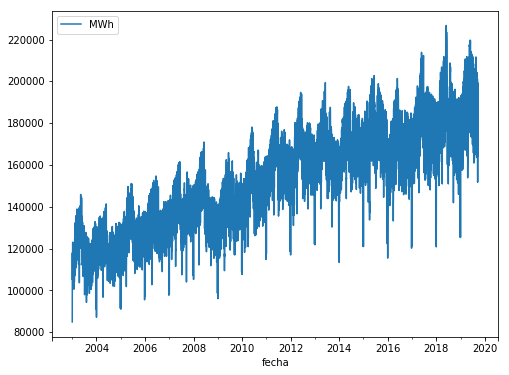

In [12]:
data[['MWh']].plot(figsize=(8,6))

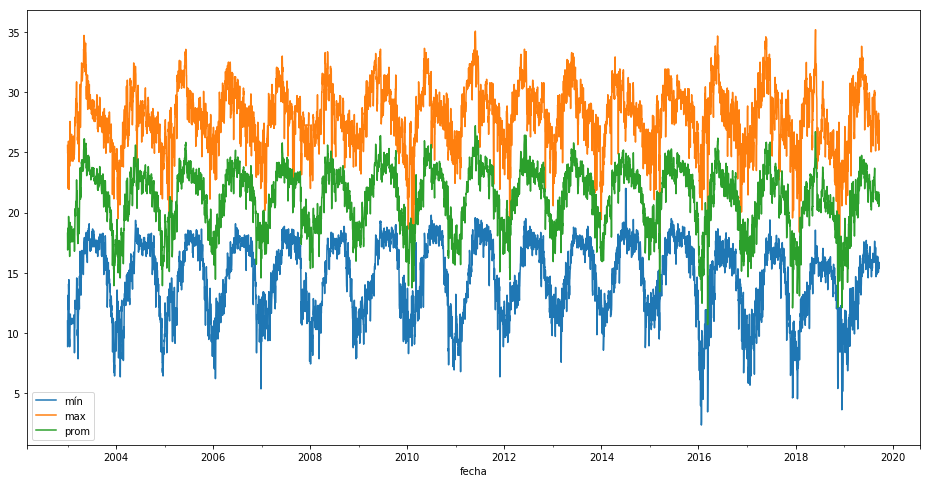

In [4]:
data[['mín','max','prom']].plot(figsize=(16,8))

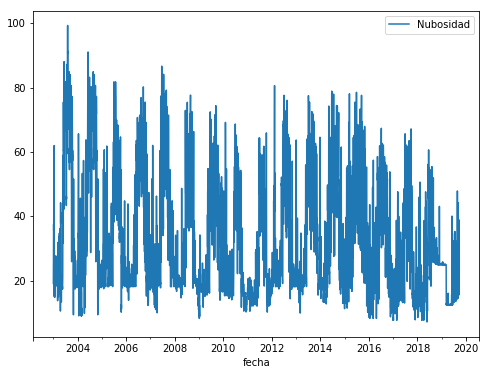

In [15]:
data[['Nubosidad']].plot(figsize=(8,6))

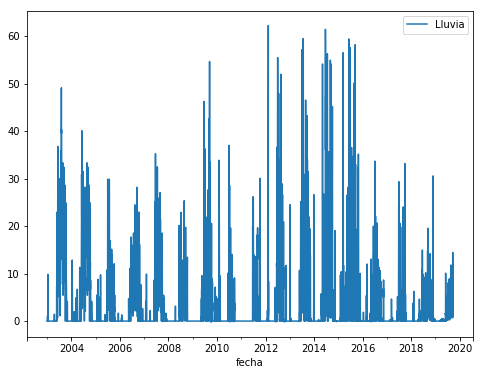

In [17]:
data[['Lluvia']].plot(figsize=(8,6))